# AIM5004_HW1

* Implementation of MLP (Multilayer Perceptron). You are going to write codes in any programming languages from the scratch. You can use some libraries, e.g. numpy, but you are NOT allowed to use any deep learning libraries, such as. Tensorflow, Pytorch, and JAX.

* You should submit the codes as Jupyter notebook, .ipynb file or google colab link. All codes should be executable.

- - -

(a) Download MNIST dataset from http://yann.lecun.com/exdb/mnist/ and report the
statistics of the dataset, e.g. how many training (and testing) images, the size of each image, the number of class and the number of images per each classes. Normalize data to [0, 1] if necessary. Show random 3 images per each class.

In [1]:
import os
import time
import gzip
import random
import idx2numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler

We got 4 data files
- train-images-idx3-ubyte.gz
- train-labels-idx1-ubyte.gz
- t10k-images-idx3-ubyte.gz
- t10k-labels-idx1-ubyte.gz

### Handling Training dataset and labels

In [3]:
## Open gz train data downloaded from lecun. - using gzip.open 
with gzip.open('./data/mnist/train-images-idx3-ubyte.gz', 'rb') as f:
    train_data_ori = idx2numpy.convert_from_file(f)

with gzip.open('./data/mnist/train-labels-idx1-ubyte.gz', 'rb') as f:
    train_label = idx2numpy.convert_from_file(f)

In [4]:
## Resizing training dataset and normalize data
train_data_ori = train_data_ori.reshape(len(train_data_ori),-1)
train_data_ori = train_data_ori.astype(float)/255
# train_data_ori = MinMaxScaler().fit_transform(train_data_ori)

In [5]:
## Encoding training label values
train_label = np.eye(10)[train_label].reshape(len(train_label),10)
# train_label = train_label.astype(int)
## Seperate out the validation set.
train_data_ori, val_data, train_label, val_label = train_test_split(train_data_ori, train_label, test_size=10000, random_state=710674)

In [6]:
# train_data = np.array(train_data)
# train_label = np.array(train_label)

### Handling Test dataset and labels

In [7]:
## Open gz test dataset
with gzip.open('./data/mnist/t10k-images-idx3-ubyte.gz', 'rb') as f:
    test_data = idx2numpy.convert_from_file(f)
    
with gzip.open('./data/mnist/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    test_label = idx2numpy.convert_from_file(f)

In [8]:
## Reshaping test dataset and normalize the data
test_data = test_data.reshape(len(test_data),-1)
test_data = test_data.astype(float)/255
# test_data = MinMaxScaler().fit_transform(test_data)

## Encoding test label values
test_label = np.eye(10)[test_label].reshape(len(test_label),10)

In [9]:
## Reshaping data into pixel formats: (28 x 28) format
train_data = train_data_ori.reshape(len(train_data_ori),28,28)
val_data = val_data.reshape(len(val_data),28,28)
test_data = test_data.reshape(len(test_data),28,28)

In [10]:
train_data.shape

(50000, 28, 28)

### Dataset Statistics

In [11]:
print("The train data has ", str(train_data.shape[0]), "samples")
print("The validation data has ", str(val_data.shape[0]), "samples")
print("The test data has ", str(test_data.shape[0]), "samples")

The train data has  50000 samples
The validation data has  10000 samples
The test data has  10000 samples


### Random image samples

* Show random 3 images per each class

In [12]:
train_df = pd.DataFrame(train_label)

In [13]:
## Finding out which data row is matched for
class0 = train_df.loc[train_df[0] == 1]
class1 = train_df.loc[train_df[1] == 1]
class2 = train_df.loc[train_df[2] == 1]
class3 = train_df.loc[train_df[3] == 1]
class4 = train_df.loc[train_df[4] == 1]
class5 = train_df.loc[train_df[5] == 1]
class6 = train_df.loc[train_df[6] == 1]
class7 = train_df.loc[train_df[7] == 1]
class8 = train_df.loc[train_df[8] == 1]
class9 = train_df.loc[train_df[9] == 1]

In [14]:
class0_index = class0.index
class1_index = class1.index
class2_index = class2.index
class3_index = class3.index
class4_index = class4.index
class5_index = class5.index
class6_index = class6.index
class7_index = class7.index
class8_index = class8.index
class9_index = class9.index

In [15]:
def SampleImages():
#     ran = random.sample(range(len(train_data)),3)
    plt.figure(figsize=(8,8))
    plt.subplot(5,6,1)
    plt.imshow(train_data[0], cmap='gray');plt.axis('off')
    plt.subplot(5,6,2)
    plt.imshow(train_data[3], cmap='gray');plt.axis('off')
    plt.subplot(5,6,3)
    plt.imshow(train_data[4], cmap='gray');plt.axis('off')
    plt.subplot(5,6,4)
    plt.imshow(train_data[13], cmap='gray');plt.axis('off')
    plt.subplot(5,6,5)
    plt.imshow(train_data[39], cmap='gray');plt.axis('off')
    plt.subplot(5,6,6)
    plt.imshow(train_data[44], cmap='gray');plt.axis('off')
    plt.subplot(5,6,7)
    plt.imshow(train_data[11], cmap='gray');plt.axis('off')
    plt.subplot(5,6,8)
    plt.imshow(train_data[16], cmap='gray');plt.axis('off')
    plt.subplot(5,6,9)
    plt.imshow(train_data[30], cmap='gray');plt.axis('off')
    plt.subplot(5,6,10)
    plt.imshow(train_data[9], cmap='gray');plt.axis('off')
    plt.subplot(5,6,11)
    plt.imshow(train_data[22], cmap='gray');plt.axis('off')
    plt.subplot(5,6,12)
    plt.imshow(train_data[38], cmap='gray');plt.axis('off')
    plt.subplot(5,6,13)
    plt.imshow(train_data[6], cmap='gray');plt.axis('off')
    plt.subplot(5,6,14)
    plt.imshow(train_data[7], cmap='gray');plt.axis('off')
    plt.subplot(5,6,15)
    plt.imshow(train_data[18], cmap='gray');plt.axis('off')
    plt.subplot(5,6,16)
    plt.imshow(train_data[1], cmap='gray');plt.axis('off')
    plt.subplot(5,6,17)
    plt.imshow(train_data[20], cmap='gray');plt.axis('off')
    plt.subplot(5,6,18)
    plt.imshow(train_data[24], cmap='gray');plt.axis('off')
    plt.subplot(5,6,19)
    plt.imshow(train_data[8], cmap='gray');plt.axis('off')
    plt.subplot(5,6,20)
    plt.imshow(train_data[21], cmap='gray');plt.axis('off')
    plt.subplot(5,6,21)
    plt.imshow(train_data[26], cmap='gray');plt.axis('off')
    plt.subplot(5,6,22)
    plt.imshow(train_data[5], cmap='gray');plt.axis('off')
    plt.subplot(5,6,23)
    plt.imshow(train_data[12], cmap='gray');plt.axis('off')
    plt.subplot(5,6,24)
    plt.imshow(train_data[17], cmap='gray');plt.axis('off')
    plt.subplot(5,6,25)
    plt.imshow(train_data[2], cmap='gray');plt.axis('off')
    plt.subplot(5,6,26)
    plt.imshow(train_data[29], cmap='gray');plt.axis('off')
    plt.subplot(5,6,27)
    plt.imshow(train_data[45], cmap='gray');plt.axis('off')
    plt.subplot(5,6,28)
    plt.imshow(train_data[15], cmap='gray');plt.axis('off')
    plt.subplot(5,6,29)
    plt.imshow(train_data[23], cmap='gray');plt.axis('off')
    plt.subplot(5,6,30)
    plt.imshow(train_data[25], cmap='gray');plt.axis('off')

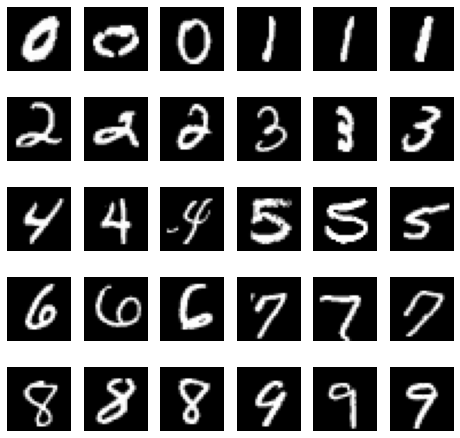

In [16]:
SampleImages()

- - -

### MNIST_MLP

(b) Implement a MLP architecture and write forward pass. You need to implement all
following layers, ReLU activation function, and softmax function. You should also
implement cross-entropy loss function.

(1) Architecture:\
[Layer 1] → Flatten layer that will flatten image 2D matrix into 1D vector.\
[Layer 2] → Dense layer (fully connected layer) with 128 hidden units, followed
by ReLU activation function.\
[Layer 3] → Dense layer (fully connected layer) with 128 hidden units, followed
by ReLU activation function.\
[Layer 4] → Output dense layer (fully connected layer) with 10 softmax outputs.

In [17]:
class Args:
    # arugments
    epochs=30
    bs=32
    lr=0.001
    verbose='store_true'
    seed=710674

args = Args()

* Activation Functions

In [18]:
## Sigmoid Function
def sigmoid(self, x, derivative=False):
    if derivative:
        return (np.exp(-x))/((np.exp(-x)+1)**2)
    return 1/(1 + np.exp(-x))

In [19]:
## Softmax Function
def softmax(self, x, derivative=False):
    exps = np.exp(x - x.max())
    if derivative:
        return exps / np.sum(exps, axis=0) * (1 - exps / np.sum(exps, axis=0))
    return exps / np.sum(exps, axis=0)

In [20]:
## Relu Function
def relu(self, x):
    return np.maximum(0, x)

In [21]:
## dReLu Function
def drelu(self,x):
    return 1 * (x > 0) 

In [22]:
## Generating MNIST MLP model structure
class MNIST_MLP():
    def __init__(self, sizes, epochs=args.epochs, lr=args.lr):
        self.sizes = sizes
        self.epochs = epochs
        self.l_rate = lr
        self.params = self.initialization()

In [23]:
## Weight Initializing
def initialization(self):
    input_layer=self.sizes[0]
    hidden_1=self.sizes[1]
    hidden_2=self.sizes[2]
    output_layer=self.sizes[3]
    
    params = {'W1':np.random.randn(hidden_1, input_layer) * np.sqrt(1. / hidden_1),
              'W2':np.random.randn(hidden_2, hidden_1) * np.sqrt(1. / hidden_2),
              'W3':np.random.randn(output_layer, hidden_2) * np.sqrt(1. / output_layer)
    }

    return params

In [24]:
## Forward propagation
def forward(self, train_data):
    params = self.params
    params['A0'] = train_data.reshape(28*28) #have to reshape for the training process
#     print(params['A0']) #testing the error

    ## hidden layer 1
    params['Z1'] = np.dot(params["W1"], params['A0'])
    params['A1'] = self.relu(params['Z1'])

    ## hidden layer 2
    params['Z2'] = np.dot(params["W2"], params['A1'])
    params['A2'] = self.relu(params['Z2'])

    ## output layer
    params['Z3'] = np.dot(params["W3"], params['A2'])
    params['A3'] = self.softmax(params['Z3'])

    return params['A3']

- - -

### Backward

(c) Implement backward pass to compute the gradients w.r.t the parameters. You should check the correctness of your implementation by either (1) using finite difference or (2) using the existing deep learning libraries. Please provide checking codes in the report .

In [25]:
## Backward propagation
def back(self, train_label, output):
    params = self.params
    change_w = {}

    ## W3 update
    error = 2 * (output - train_label) / output.shape[0] * self.softmax(params['Z3'], derivative=True)
    change_w['W3'] = np.outer(error, params['A2'])

    ## W2 update
    error = np.dot(params['W3'].T, error) * self.relu(params['Z2'], derivative=True)
    change_w['W2'] = np.outer(error, params['A1'])

    ## W1 update
    error = np.dot(params['W2'].T, error) * self.relu(params['Z1'], derivative=True)
    change_w['W1'] = np.outer(error, params['A0'])

    return change_w

In [26]:
## Weight parameters update
def update_network_parameters(self, changes_to_w):
    for key, value in changes_to_w.items():
        self.params[key] -= self.l_rate * value

In [27]:
## Calculating accuracy with validation data and following label
def compute_accuracy(self, val_data, val_label):
    predictions = []
    for x, y in zip(val_data, val_label):
        output = self.forward(x)
        pred = np.argmax(output)
        predictions.append(pred == np.argmax(y))
    
    return np.mean(predictions)

- - -

#### Comparison with pytorch library

* (2) Using the existing deep learning libraries - with pytorch

In [28]:
## Defining Mean Squared Error calculation
def mse_cal(y, y_pred):
    mse_y = np.square(np.subtract(y, y_pred)).mean()
    return mse_y

In [29]:
import torch
import torch.nn as nn 
import torch.nn.functional as F
import torch.nn.init as init 
import torchvision
from torchvision import transforms, datasets 
from torch.utils.data import DataLoader

In [30]:
#Setting torch environment

if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
    
print('Using PyTorch version:', torch.__version__, ' Device: ', DEVICE)

Using PyTorch version: 1.9.1  Device:  cuda


In [31]:
class Args:
    # arugments
    epochs=30
    bs=32
    lr=0.001
    verbose='store_true'
    seed=710674

args = Args()

In [32]:
# MNIST dataset
train_d = datasets.MNIST(root='../data/MNIST',
                         train=True,
                         transform=transforms.ToTensor(),
                         download=True)

test_d = datasets.MNIST(root='../data/MNIST',
                        train=False,
                        transform=transforms.ToTensor(),
                        download=True)

In [33]:
## Setting data loader
train_loader = torch.utils.data.DataLoader(dataset=train_d, batch_size=args.bs, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_d, batch_size=args.bs, shuffle=True)

In [34]:
class MLP_MNIST_torch(nn.Module):
    def __init__(self):
        super(MLP_MNIST_torch, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 128)
        self.layer2 = nn.Linear(128, 128)
        self.layer3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.layer1(x)
        x = F.relu(x)
        x = self.layer2(x)
        x = F.relu(x)
        x = self.layer3(x)
        x = F.log_softmax(x, dim=1)
        return x

In [35]:
model_MNIST = MLP_MNIST_torch()
model = model_MNIST.to(DEVICE)
print(model)

MLP_MNIST_torch(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=10, bias=True)
)


In [36]:
## loss function and optimizer
criterion = nn.CrossEntropyLoss().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr=args.lr)

In [37]:
for epoch in range(args.epochs):
    loss = 0
    batch = len(train_loader)

    for images, labels in train_loader: 
        images = images.view(-1, 28 * 28).to(DEVICE) 
        labels = labels.to(DEVICE)
        
        optimizer.zero_grad()
        hypothesis = model(images)
        cost = criterion(hypothesis, labels)
        cost.backward()
        optimizer.step()
        loss += cost / batch

    print('Epoch:', '%03d' % (epoch + 1), 'Training loss =', '{:.5f}'.format(loss))

Epoch: 001 Training loss = 2.28069
Epoch: 002 Training loss = 2.19065
Epoch: 003 Training loss = 1.94449
Epoch: 004 Training loss = 1.43410
Epoch: 005 Training loss = 0.95264
Epoch: 006 Training loss = 0.71269
Epoch: 007 Training loss = 0.59126
Epoch: 008 Training loss = 0.52058
Epoch: 009 Training loss = 0.47499
Epoch: 010 Training loss = 0.44327
Epoch: 011 Training loss = 0.41959
Epoch: 012 Training loss = 0.40122
Epoch: 013 Training loss = 0.38651
Epoch: 014 Training loss = 0.37427
Epoch: 015 Training loss = 0.36360
Epoch: 016 Training loss = 0.35448
Epoch: 017 Training loss = 0.34615
Epoch: 018 Training loss = 0.33880
Epoch: 019 Training loss = 0.33212
Epoch: 020 Training loss = 0.32604
Epoch: 021 Training loss = 0.32038
Epoch: 022 Training loss = 0.31502
Epoch: 023 Training loss = 0.31009
Epoch: 024 Training loss = 0.30542
Epoch: 025 Training loss = 0.30089
Epoch: 026 Training loss = 0.29665
Epoch: 027 Training loss = 0.29261
Epoch: 028 Training loss = 0.28873
Epoch: 029 Training 

In [38]:
# test model using test sets
with torch.no_grad():
    y_pred = []
    images_test = test_d.data.view(-1, 28 * 28).float().to(DEVICE)
    labels_test = test_d.targets.to(DEVICE)
    
    prediction = model(images_test)
    y_pred.append(prediction)
    correct_prediction = torch.argmax(prediction, 1) == labels_test
    accuracy = correct_prediction.float().mean()
    print('Test Accuracy:', accuracy.item())

Test Accuracy: 0.9146999716758728


- - -

### SGD algorithm based training

(d) Implement a stochastic gradient descent (SGD) algorithm and train your model. Please provide training and validation loss curves in a single plot.

In [43]:
## training and evaluate with training dataset and validation dataset.
def train(self, train_data, train_label, val_data, val_label):
    start_time = time.time()
    for iteration in range(self.epochs):
        for x,y in zip(train_data, train_label):
            output = self.forward(x)
            changes_to_w = self.back(y, output)
            self.update_network_parameters(changes_to_w)
            
        accuracy = self.compute_accuracy(val_data, val_label)
        print('Epoch: {0}, Time Spent: {1:.2f}s, Accuracy: {2:.2f}%'.format(
            iteration+1, time.time() - start_time, accuracy * 100
        ))

* Overall process

In [44]:
class MNIST_MLP_OVERALL():
    def __init__(self, sizes, epochs=args.epochs, lr=args.lr):
        self.sizes = sizes
        self.epochs = epochs
        self.l_rate = lr
        
        self.loss =[]
        self.acc =[]
        self.params = self.initialization()

    def softmax(self, x, derivative=False):
        exps = np.exp(x - x.max())
        if derivative:
            return exps / np.sum(exps, axis=0) * (1 - exps / np.sum(exps, axis=0))
        return exps / np.sum(exps, axis=0)
    
    def relu(self, x, derivative=False):
        if derivative:
            return np.maximum(0,x)
        return np.maximum(0, x)
    
    def drelu(self, x, derivative=False):
        if derivative:
            return 1 * (x > 0)
        return 1 * (x > 0) 

    def initialization(self):
        input_layer=self.sizes[0]
        hidden_1=self.sizes[1]
        hidden_2=self.sizes[2]
        output_layer=self.sizes[3]

        params = {
            'W1':np.random.randn(hidden_1, input_layer) * np.sqrt(1. / hidden_1),
            'W2':np.random.randn(hidden_2, hidden_1) * np.sqrt(1. / hidden_2),
            'W3':np.random.randn(output_layer, hidden_2) * np.sqrt(1. / output_layer)
        }

        return params

    def forward(self, train_data):
        params = self.params
        params['A0'] = train_data.reshape(28*28)
#         print(params['A0'])

        # hidden layer 1
        params['Z1'] = np.dot(params["W1"], params['A0'])
        params['A1'] = self.relu(params['Z1'])

        # hidden layer 2
        params['Z2'] = np.dot(params["W2"], params['A1'])
        params['A2'] = self.relu(params['Z2'])

        # output layer
        params['Z3'] = np.dot(params["W3"], params['A2'])
        params['A3'] = self.softmax(params['Z3'])
 

        return params['A3']

    
    def back(self, train_label, output):
        params = self.params
        change_w = {}
        l = 0

        # W3 update
        error = 2 * (output - train_label) / output.shape[0] * self.softmax(params['Z3'], derivative=True)
        change_w['W3'] = np.outer(error, params['A2'])

        # W2 update
        error = np.dot(params['W3'].T, error) * self.drelu(params['Z2'], derivative=True)
        change_w['W2'] = np.outer(error, params['A1'])

        # W1 update
        error = np.dot(params['W2'].T, error) * self.drelu(params['Z1'], derivative=True)
        change_w['W1'] = np.outer(error, params['A0'])
        
        return change_w

    def update_network_parameters(self, changes_to_w):        
        for key, value in changes_to_w.items():
            self.params[key] -= self.l_rate * value

    def compute_accuracy(self, val_data, val_label):
        predictions = []

        for x, y in zip(val_data, val_label):
            output = self.forward(x)
            pred = np.argmax(output)
            predictions.append(pred == np.argmax(y))
        
        return np.mean(predictions)
           
    
    ## training and evaluate with training dataset and validation dataset.
    def train(self, train_data, train_label, val_data, val_label):
        start_time = time.time()
        for iteration in range(self.epochs):
            l = 0
            for x,y in zip(train_data, train_label):
                output = self.forward(x)
                changes_to_w = self.back(y, output)
                self.update_network_parameters(changes_to_w)
                
            accuracy = self.compute_accuracy(val_data, val_label)
            self.acc.append(accuracy*100)
            print('Epoch: {0}, Time Spent: {1:.2f}s, Accuracy: {2:.2f}%'.format(
                iteration+1, time.time() - start_time, accuracy * 100
            ))
    def plot(self):
        plt.plot(self.acc)
        plt.xlabel('epochs')
        plt.ylabel('Accuracy')

Epoch: 1, Time Spent: 11.36s, Accuracy: 75.24%
Epoch: 2, Time Spent: 22.72s, Accuracy: 84.65%
Epoch: 3, Time Spent: 34.17s, Accuracy: 87.19%
Epoch: 4, Time Spent: 45.73s, Accuracy: 88.44%
Epoch: 5, Time Spent: 57.15s, Accuracy: 89.17%
Epoch: 6, Time Spent: 68.58s, Accuracy: 89.79%
Epoch: 7, Time Spent: 79.98s, Accuracy: 90.14%
Epoch: 8, Time Spent: 91.39s, Accuracy: 90.62%
Epoch: 9, Time Spent: 102.81s, Accuracy: 90.94%
Epoch: 10, Time Spent: 114.21s, Accuracy: 91.20%
Epoch: 11, Time Spent: 125.63s, Accuracy: 91.37%
Epoch: 12, Time Spent: 137.04s, Accuracy: 91.69%
Epoch: 13, Time Spent: 148.44s, Accuracy: 91.82%
Epoch: 14, Time Spent: 159.86s, Accuracy: 91.98%
Epoch: 15, Time Spent: 171.27s, Accuracy: 92.18%
Epoch: 16, Time Spent: 182.67s, Accuracy: 92.36%
Epoch: 17, Time Spent: 194.10s, Accuracy: 92.49%
Epoch: 18, Time Spent: 205.50s, Accuracy: 92.63%
Epoch: 19, Time Spent: 216.91s, Accuracy: 92.76%
Epoch: 20, Time Spent: 228.33s, Accuracy: 92.93%
Epoch: 21, Time Spent: 239.74s, Accur

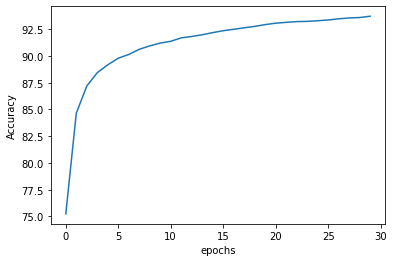

In [45]:
model = MNIST_MLP_OVERALL(sizes=[784, 128, 128, 10])
model.train(train_data, train_label, val_data, val_label)
model.plot()

- - -

### Try various hyperparameters

(e) Train with different hyperparameters. Try at least 5 different learning rates and minibatch sizes. Plot training and validation curves for all different configurations in a single plot.

* In the training process above, I used "batch = 32, epochs=30, learning rate = 0.001". Let's change learning rate values

#### lr = 0.1 

In [52]:
class Args:
    # arugments
    epochs=30
    bs=32
    lr=0.1
    verbose='store_true'
    seed=710674

args = Args()

In [53]:
model = MNIST_MLP_OVERALL(sizes=[784, 128, 128, 10])
model.train(train_data, train_label, val_data, val_label)

Epoch: 1, Time Spent: 11.86s, Accuracy: 78.86%
Epoch: 2, Time Spent: 23.79s, Accuracy: 84.69%
Epoch: 3, Time Spent: 35.66s, Accuracy: 86.95%
Epoch: 4, Time Spent: 47.45s, Accuracy: 88.01%
Epoch: 5, Time Spent: 59.24s, Accuracy: 88.74%
Epoch: 6, Time Spent: 71.03s, Accuracy: 89.35%
Epoch: 7, Time Spent: 82.83s, Accuracy: 89.84%
Epoch: 8, Time Spent: 94.61s, Accuracy: 90.17%
Epoch: 9, Time Spent: 106.46s, Accuracy: 90.45%
Epoch: 10, Time Spent: 118.27s, Accuracy: 90.73%
Epoch: 11, Time Spent: 130.06s, Accuracy: 91.00%
Epoch: 12, Time Spent: 141.89s, Accuracy: 91.27%
Epoch: 13, Time Spent: 153.69s, Accuracy: 91.53%
Epoch: 14, Time Spent: 165.51s, Accuracy: 91.66%
Epoch: 15, Time Spent: 177.31s, Accuracy: 91.82%
Epoch: 16, Time Spent: 189.11s, Accuracy: 91.94%
Epoch: 17, Time Spent: 200.92s, Accuracy: 92.04%
Epoch: 18, Time Spent: 212.71s, Accuracy: 92.14%
Epoch: 19, Time Spent: 224.55s, Accuracy: 92.30%
Epoch: 20, Time Spent: 236.37s, Accuracy: 92.40%
Epoch: 21, Time Spent: 248.17s, Accur

TypeError: unsupported operand type(s) for +: 'NoneType' and 'Text'

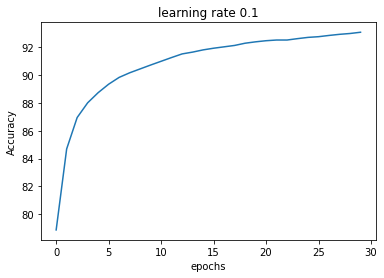

In [54]:
print(model.plot() + plt.title("learning rate 0.1"))

#### lr = 0.01

In [55]:
class Args:
    # arugments
    epochs=30
    bs=32
    lr=0.01
    verbose='store_true'
    seed=710674

args = Args()

In [56]:
model = MNIST_MLP_OVERALL(sizes=[784, 128, 128, 10])
model.train(train_data, train_label, val_data, val_label)

Epoch: 1, Time Spent: 11.70s, Accuracy: 78.36%
Epoch: 2, Time Spent: 23.31s, Accuracy: 84.35%
Epoch: 3, Time Spent: 34.89s, Accuracy: 86.87%
Epoch: 4, Time Spent: 46.45s, Accuracy: 88.35%
Epoch: 5, Time Spent: 57.98s, Accuracy: 89.18%
Epoch: 6, Time Spent: 69.51s, Accuracy: 89.98%
Epoch: 7, Time Spent: 81.09s, Accuracy: 90.52%
Epoch: 8, Time Spent: 92.63s, Accuracy: 91.03%
Epoch: 9, Time Spent: 104.16s, Accuracy: 91.23%
Epoch: 10, Time Spent: 115.70s, Accuracy: 91.45%
Epoch: 11, Time Spent: 127.25s, Accuracy: 91.69%
Epoch: 12, Time Spent: 138.81s, Accuracy: 91.82%
Epoch: 13, Time Spent: 150.35s, Accuracy: 92.11%
Epoch: 14, Time Spent: 161.87s, Accuracy: 92.22%
Epoch: 15, Time Spent: 173.57s, Accuracy: 92.39%
Epoch: 16, Time Spent: 185.09s, Accuracy: 92.51%
Epoch: 17, Time Spent: 196.63s, Accuracy: 92.58%
Epoch: 18, Time Spent: 208.13s, Accuracy: 92.70%
Epoch: 19, Time Spent: 219.67s, Accuracy: 92.74%
Epoch: 20, Time Spent: 231.19s, Accuracy: 92.81%
Epoch: 21, Time Spent: 242.72s, Accur

TypeError: unsupported operand type(s) for +: 'NoneType' and 'Text'

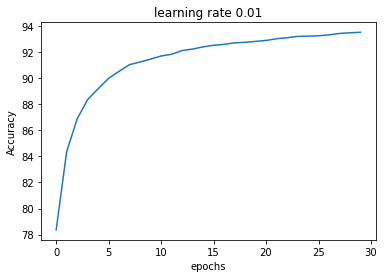

In [57]:
print(model.plot() + plt.title("learning rate 0.01"))

#### lr = 0.05

In [58]:
class Args:
    # arugments
    epochs=30
    bs=32
    lr=0.05
    verbose='store_true'
    seed=710674

args = Args()

In [59]:
model = MNIST_MLP_OVERALL(sizes=[784, 128, 128, 10])
model.train(train_data, train_label, val_data, val_label)

Epoch: 1, Time Spent: 11.15s, Accuracy: 73.92%
Epoch: 2, Time Spent: 22.28s, Accuracy: 83.01%
Epoch: 3, Time Spent: 33.42s, Accuracy: 85.90%
Epoch: 4, Time Spent: 44.60s, Accuracy: 87.48%
Epoch: 5, Time Spent: 55.78s, Accuracy: 88.58%
Epoch: 6, Time Spent: 66.97s, Accuracy: 89.17%
Epoch: 7, Time Spent: 78.23s, Accuracy: 89.72%
Epoch: 8, Time Spent: 89.43s, Accuracy: 90.09%
Epoch: 9, Time Spent: 100.63s, Accuracy: 90.51%
Epoch: 10, Time Spent: 111.82s, Accuracy: 90.91%
Epoch: 11, Time Spent: 123.11s, Accuracy: 91.23%
Epoch: 12, Time Spent: 134.45s, Accuracy: 91.48%
Epoch: 13, Time Spent: 145.71s, Accuracy: 91.68%
Epoch: 14, Time Spent: 156.93s, Accuracy: 91.94%
Epoch: 15, Time Spent: 168.14s, Accuracy: 92.07%
Epoch: 16, Time Spent: 179.36s, Accuracy: 92.22%
Epoch: 17, Time Spent: 190.59s, Accuracy: 92.40%
Epoch: 18, Time Spent: 201.82s, Accuracy: 92.54%
Epoch: 19, Time Spent: 213.06s, Accuracy: 92.71%
Epoch: 20, Time Spent: 224.27s, Accuracy: 92.79%
Epoch: 21, Time Spent: 235.49s, Accur

TypeError: unsupported operand type(s) for +: 'NoneType' and 'Text'

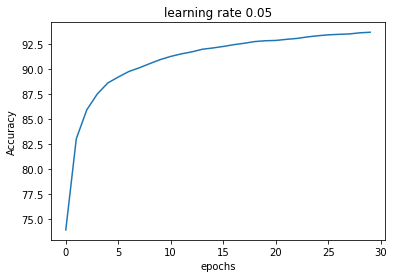

In [60]:
print(model.plot() + plt.title("learning rate 0.05"))

#### lr = 0.005

In [61]:
class Args:
    # arugments
    epochs=30
    bs=32
    lr=0.005
    verbose='store_true'
    seed=710674

args = Args()

In [62]:
model = MNIST_MLP_OVERALL(sizes=[784, 128, 128, 10])
model.train(train_data, train_label, val_data, val_label)

Epoch: 1, Time Spent: 11.41s, Accuracy: 77.51%
Epoch: 2, Time Spent: 22.69s, Accuracy: 84.55%
Epoch: 3, Time Spent: 33.92s, Accuracy: 86.85%
Epoch: 4, Time Spent: 45.18s, Accuracy: 88.09%
Epoch: 5, Time Spent: 56.41s, Accuracy: 88.96%
Epoch: 6, Time Spent: 67.75s, Accuracy: 89.58%
Epoch: 7, Time Spent: 79.03s, Accuracy: 90.03%
Epoch: 8, Time Spent: 90.28s, Accuracy: 90.49%
Epoch: 9, Time Spent: 101.53s, Accuracy: 90.80%
Epoch: 10, Time Spent: 112.77s, Accuracy: 91.09%
Epoch: 11, Time Spent: 124.03s, Accuracy: 91.29%
Epoch: 12, Time Spent: 135.34s, Accuracy: 91.42%
Epoch: 13, Time Spent: 146.63s, Accuracy: 91.64%
Epoch: 14, Time Spent: 158.03s, Accuracy: 91.82%
Epoch: 15, Time Spent: 169.39s, Accuracy: 92.00%
Epoch: 16, Time Spent: 180.76s, Accuracy: 92.13%
Epoch: 17, Time Spent: 192.11s, Accuracy: 92.26%
Epoch: 18, Time Spent: 203.36s, Accuracy: 92.38%
Epoch: 19, Time Spent: 214.61s, Accuracy: 92.47%
Epoch: 20, Time Spent: 225.85s, Accuracy: 92.60%
Epoch: 21, Time Spent: 237.11s, Accur

TypeError: unsupported operand type(s) for +: 'NoneType' and 'Text'

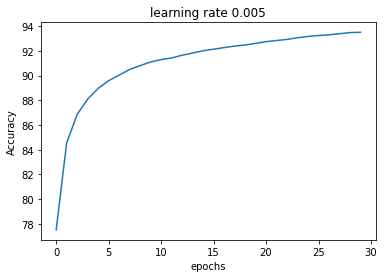

In [63]:
print(model.plot() + plt.title("learning rate 0.005"))

#### lr = 0.0001

In [64]:
class Args:
    # arugments
    epochs=30
    bs=32
    lr=0.0001
    verbose='store_true'
    seed=710674

args = Args()

In [65]:
model = MNIST_MLP_OVERALL(sizes=[784, 128, 128, 10])
model.train(train_data, train_label, val_data, val_label)

Epoch: 1, Time Spent: 11.29s, Accuracy: 78.82%
Epoch: 2, Time Spent: 22.53s, Accuracy: 84.73%
Epoch: 3, Time Spent: 33.77s, Accuracy: 87.00%
Epoch: 4, Time Spent: 44.99s, Accuracy: 88.28%
Epoch: 5, Time Spent: 56.23s, Accuracy: 89.12%
Epoch: 6, Time Spent: 67.56s, Accuracy: 89.81%
Epoch: 7, Time Spent: 78.92s, Accuracy: 90.28%
Epoch: 8, Time Spent: 90.15s, Accuracy: 90.69%
Epoch: 9, Time Spent: 101.39s, Accuracy: 90.97%
Epoch: 10, Time Spent: 112.64s, Accuracy: 91.31%
Epoch: 11, Time Spent: 123.87s, Accuracy: 91.56%
Epoch: 12, Time Spent: 135.10s, Accuracy: 91.79%
Epoch: 13, Time Spent: 146.35s, Accuracy: 91.90%
Epoch: 14, Time Spent: 157.59s, Accuracy: 92.09%
Epoch: 15, Time Spent: 168.83s, Accuracy: 92.30%
Epoch: 16, Time Spent: 180.09s, Accuracy: 92.33%
Epoch: 17, Time Spent: 191.42s, Accuracy: 92.37%
Epoch: 18, Time Spent: 202.80s, Accuracy: 92.56%
Epoch: 19, Time Spent: 214.03s, Accuracy: 92.74%
Epoch: 20, Time Spent: 225.26s, Accuracy: 92.81%
Epoch: 21, Time Spent: 236.50s, Accur

TypeError: unsupported operand type(s) for +: 'NoneType' and 'Text'

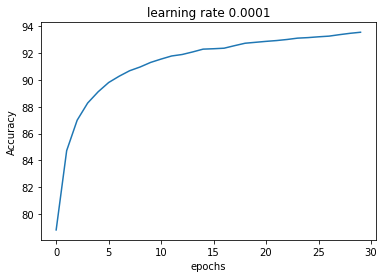

In [66]:
print(model.plot() + plt.title("learning rate 0.0001"))

- - -